<a href="https://colab.research.google.com/github/aeliscu/HeartDisease/blob/main/Supervised_Learning_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#I. Introduction

According to the Center for Disease Control, heart disease is the leading cause of mortality in the United States, accounting for nearly a quarter of all deaths*. By understanding which diagnostics and symptoms are most indicative of disease, we may be able to accelerate diagnosis and treatment.

*https://www.cdc.gov/heartdisease/facts.htm

###Hypothesis
With the selected model, we'll be able to predict heart disease with higher accuracy.



##1. The Data

This dataset, obtained from Kaggle, was originally published in the UCI Machine Learning Repository, and contains data from 303 patients of Dr. Robert Detrano at the V.A. Medical Center, Long Beach and Cleveland Clinic Foundation.

Link: https://www.kaggle.com/ronitf/heart-disease-uci

The data consists of basic demographic information, patient symptoms, and diagnostic measurements, as detailed below.

###A. Variables & Explanation

1. age: age in years
2. sex: sex (1 = male; 0 = female)
3. cp: chest pain type
    - - Value 0: typical angina
    - - Value 1: atypical angina
    - - Value 2: non-anginal pain
    - - Value 3: asymptomatic
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholesterol in mg/dl (blood cholesterol including HDL, LDL and
6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. restecg: resting electrocardiographic results (values 0,1,2)
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak = ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
    - - Value 1: upsloping
    - - Value 2: flat
    - - Value 3: downsloping
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. target: diagnosis of heart disease (angiographic disease status)
    - - Value 0: < 50% diameter narrowing (No Heart Disease)
    - - Value 1: > 50% diameter narrowing (Heart Disease)

#II. Setup and EDA

##1. Set Up Environment & Import Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, fbeta_score, classification_report, roc_auc_score
from sklearn.model_selection import cross_val_score


%matplotlib inline

In [ ]:
from google.colab import files
data_to_load = files.upload()
#upload heart.csv from capstone folder

Saving heart.csv to heart (1).csv


In [ ]:
import io
heart_df = pd.read_csv(io.BytesIO(data_to_load['heart.csv']))

In [ ]:
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


##2. Exploratory Data Analysis

###A. Data Cleaning- Variable Types & Missing Values

In [ ]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
heart_df[('target')].value_counts()

1    165
0    138
Name: target, dtype: int64

The dataset does not have missing or null values, therefore imputation and/or deletion are not necessary at this stage. Data types appear appropriate for all features.

###B. Data Cleaning- Outlier Detection


Excluding measures that are categorical in nature (even if they are represented numerically), I will visually inspect for outliers using boxplots on the following measures: age, trestbps, chol, thalach, oldpeak.

Text(0.5, 1.0, 'Exercise Induced ST Depression')

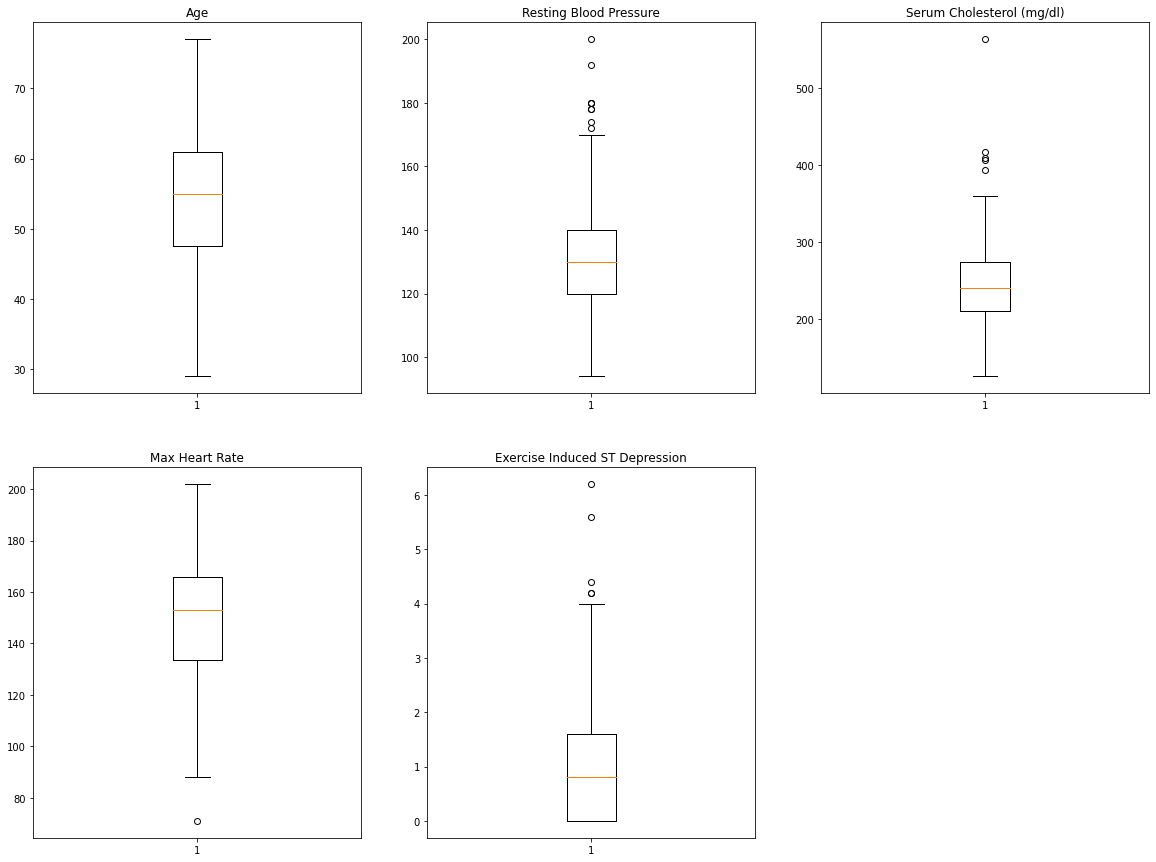

In [ ]:
plt.figure(figsize=(20,15))

plt.subplot(2,3,1)
plt.boxplot(heart_df['age'])
plt.title('Age')

plt.subplot(2,3,2)
plt.boxplot(heart_df['trestbps'])
plt.title('Resting Blood Pressure')

plt.subplot(2,3,3)
plt.boxplot(heart_df['chol'])
plt.title('Serum Cholesterol (mg/dl)')

plt.subplot(2,3,4)
plt.boxplot(heart_df['thalach'])
plt.title('Max Heart Rate')

plt.subplot(2,3,5)
plt.boxplot(heart_df['oldpeak'])
plt.title('Exercise Induced ST Depression')


After reviewing the outliers I have elected to keep them in the population, as I have no scientific basis to deem these values invalid. They may in fact be useful, because unusually elevated/low measures may be significant indicators of disease.

###C. Data Exploration- Visualization

[Text(0, 0, 'None'),
 Text(0, 0, 'Normal'),
 Text(0, 0, 'Fixed Defect'),
 Text(0, 0, 'Reversible Defect')]

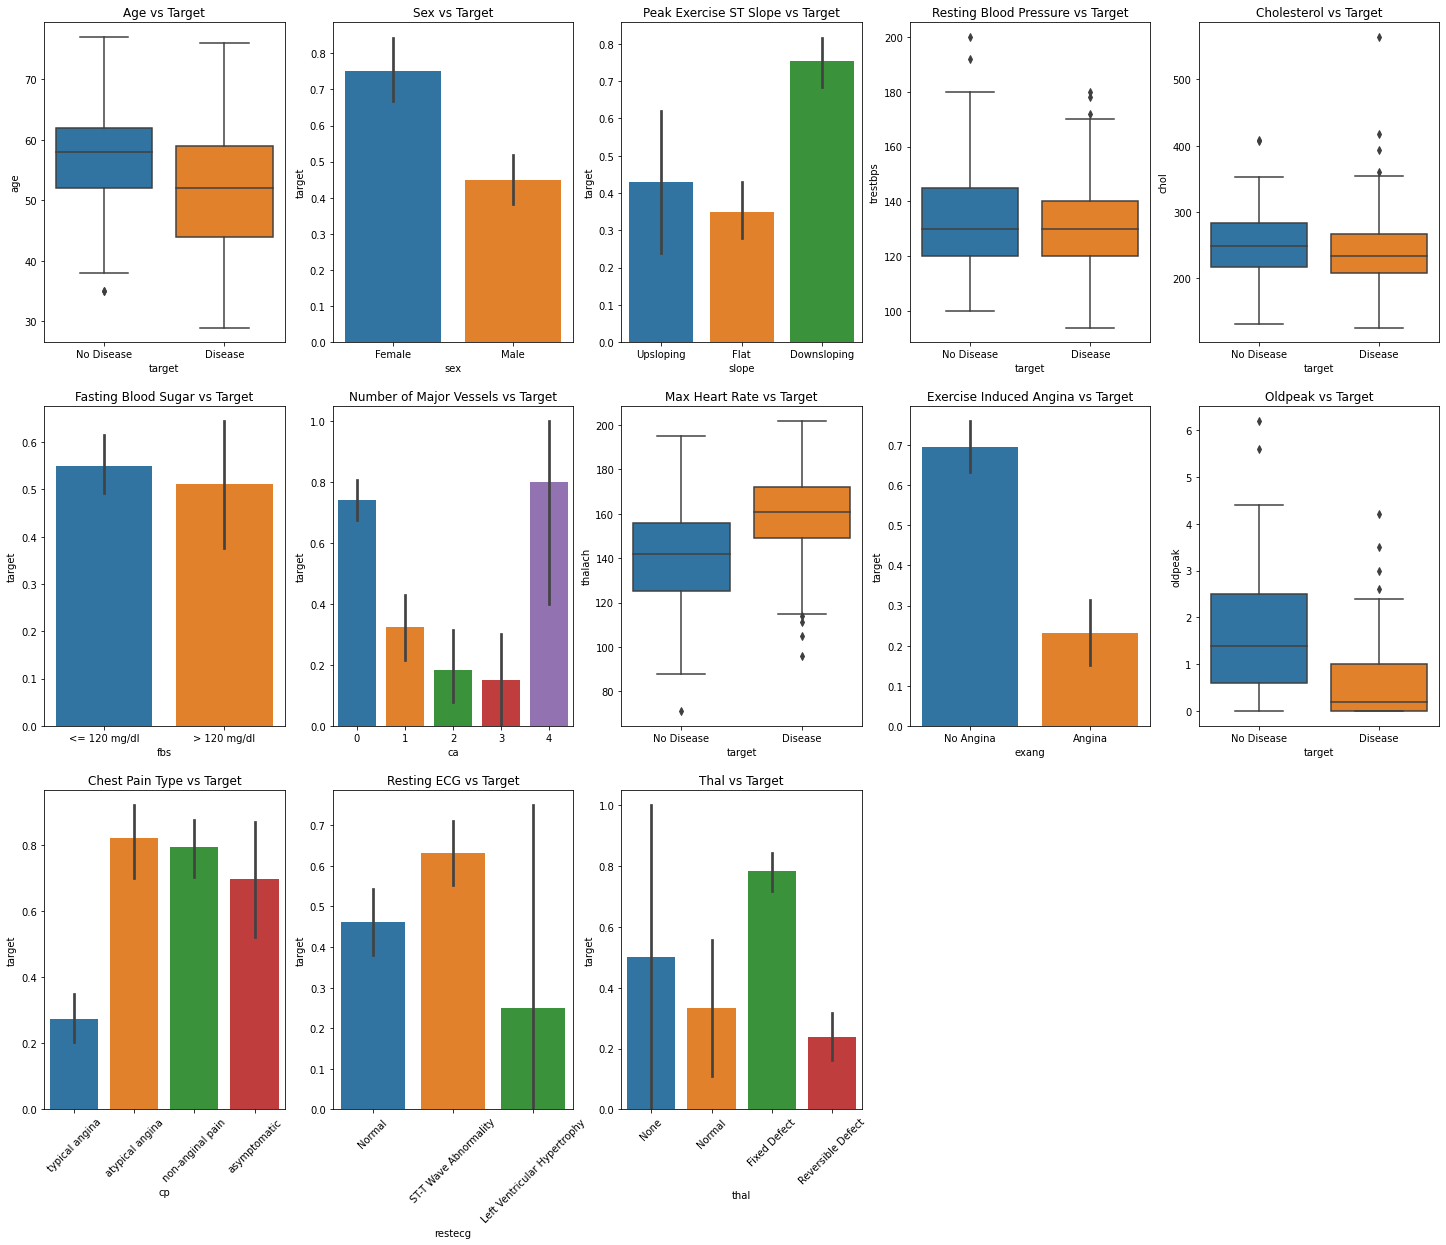

In [ ]:
plt.figure(figsize=(25,20))

#(n)
plt.subplot(3,5,1)
ax = sns.boxplot(x='target', y='age', data=heart_df)
ax.set_title('Age vs Target')
ax.set_xticklabels(['No Disease', 'Disease'])

#(c)
plt.subplot(3,5,2)
ax = sns.barplot(x='sex', y='target', data=heart_df)
ax.set_title('Sex vs Target')
ax.set_xticklabels(['Female', 'Male'])

plt.subplot(3,5,11)
ax = sns.barplot(x='cp', y='target', data=heart_df)
ax.set_title('Chest Pain Type vs Target')
ax.set_xticklabels(['typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'], rotation=45)

plt.subplot(3,5,4)
ax = sns.boxplot(x='target', y='trestbps', data=heart_df)
ax.set_title('Resting Blood Pressure vs Target')
ax.set_xticklabels(['No Disease', 'Disease'])

plt.subplot(3,5,5)
ax = sns.boxplot(x='target', y='chol', data=heart_df)
ax.set_title('Cholesterol vs Target')
ax.set_xticklabels(['No Disease', 'Disease'])

plt.subplot(3,5,6)
ax = sns.barplot(x='fbs', y='target', data=heart_df)
ax.set_title('Fasting Blood Sugar vs Target')
ax.set_xticklabels(['<= 120 mg/dl', '> 120 mg/dl'])

plt.subplot(3,5,12)
ax = sns.barplot(x='restecg', y='target', data=heart_df)
ax.set_title('Resting ECG vs Target')
ax.set_xticklabels(['Normal', 'ST-T Wave Abnormality', 'Left Ventricular Hypertrophy'], rotation = 45)

plt.subplot(3,5,8)
ax = sns.boxplot(x='target', y='thalach', data=heart_df)
ax.set_title('Max Heart Rate vs Target')
ax.set_xticklabels(['No Disease', 'Disease'])

plt.subplot(3,5,9)
ax = sns.barplot(x='exang', y='target', data=heart_df)
ax.set_title('Exercise Induced Angina vs Target')
ax.set_xticklabels(['No Angina', 'Angina'])

plt.subplot(3,5,10)
ax = sns.boxplot(x='target', y='oldpeak', data=heart_df)
ax.set_title('Oldpeak vs Target')
ax.set_xticklabels(['No Disease', 'Disease'])

plt.subplot(3,5,3)
ax = sns.barplot(x='slope', y='target', data=heart_df)
ax.set_title('Peak Exercise ST Slope vs Target')
ax.set_xticklabels(['Upsloping', 'Flat', 'Downsloping'])

plt.subplot(3,5,7)
ax = sns.barplot(x='ca', y='target', data=heart_df)
ax.set_title('Number of Major Vessels vs Target')
#ax.set_xticklabels(['No Angina', 'Angina'])

plt.subplot(3,5,13)
ax = sns.barplot(x='thal', y='target', data=heart_df)
ax.set_title('Thal vs Target')
ax.set_xticklabels(['None', 'Normal', 'Fixed Defect', 'Reversible Defect'], rotation=45)

[Text(0, 0, 'No Disease'), Text(0, 0, 'Disease')]

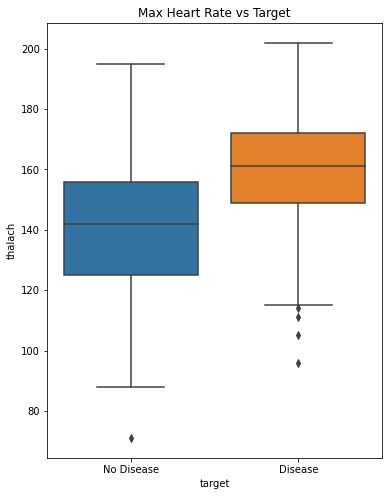

In [ ]:
plt.figure(figsize=(6, 8))
ax = sns.boxplot(x='target', y='thalach', data=heart_df)
ax.set_title('Max Heart Rate vs Target')
ax.set_xticklabels(['No Disease', 'Disease'])

#III. Data Models

In [ ]:
#Variable definition & train-test split for use in most models
X= heart_df.drop(columns='target')
y = heart_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=5)

##1. K Nearest Neighbor

In [ ]:
#Eliminate categorical-type variables because KNN can't process them
Xknn = heart_df.drop(columns = ['target', 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

Xknn_train, Xknn_test, yknn_train, yknn_test = train_test_split(Xknn, y, test_size=.30, random_state=5)

In [ ]:
#Scale using standard scaler (sklearn.preprocessing.StandardScaler)
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(Xknn_train)

X_knntrain = scaler.transform(Xknn_train)
X_knntest = scaler.transform(Xknn_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#Fit KNN model
knn = KNeighborsClassifier(n_neighbors=9) #Tried different values for n. 9 had the best and most balanced f1-score
knn.fit(Xknn_train, yknn_train)

#Generate predictions
#knn_score = knn.score(Xknn_test, yknn_test)
knn_predictions = knn.predict(Xknn_test)

#Evaluate
print(classification_report(yknn_test, knn_predictions, target_names = ['No Heart Disease', 'Heart Disease']))

                  precision    recall  f1-score   support

No Heart Disease       0.67      0.74      0.70        43
   Heart Disease       0.74      0.67      0.70        48

        accuracy                           0.70        91
       macro avg       0.71      0.71      0.70        91
    weighted avg       0.71      0.70      0.70        91



Tried different values for n_neighbors. n=9 had the best and most balanced f1-score

##2. Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(
    criterion='entropy',
    max_features=6,
    max_depth=4
)

dt.fit(X_train, y_train)

#dt_score = dt.score(X_test, y_test)

dt_predictions = dt.predict(X_test)

print(classification_report(y_test, dt_predictions, target_names = ['No Heart Disease', 'Heart Disease']))

                  precision    recall  f1-score   support

No Heart Disease       0.82      0.74      0.78        43
   Heart Disease       0.79      0.85      0.82        48

        accuracy                           0.80        91
       macro avg       0.80      0.80      0.80        91
    weighted avg       0.80      0.80      0.80        91



Determined max features and max depth based on trial and error. Picked a combination that yielded good results consistently, although results varied with no random state defined.

I will attempt to improve the model by tuning hyperparameters using GridSearchCV below.

In [ ]:
#Hyperparameter tuning
parameters ={'max_depth': [5, 10, 15, 20, 25, 30],
     'criterion' : ['gini', 'entropy'],
     'max_features': [1,2,4,8],
     'min_samples_leaf': [3,5,7,10,15],
     'min_samples_split': [2,5,10]}

from sklearn.model_selection import GridSearchCV
grid_search = DecisionTreeClassifier()
grid_search = GridSearchCV(
    grid_search, 
    parameters, 
    cv=5,
    scoring='accuracy',n_jobs=-1)

grid_result= grid_search.fit(X_train, y_train)
print('Best Params: ', grid_result.best_params_)
print('Best Score: ', grid_result.best_score_)

Best Params:  {'criterion': 'gini', 'max_depth': 5, 'max_features': 4, 'min_samples_leaf': 10, 'min_samples_split': 5}
Best Score:  0.7880398671096346


In [ ]:
dt = DecisionTreeClassifier(
    max_depth=10,
    criterion='entropy',
    max_features=4,
    min_samples_leaf=10,
    min_samples_split=5
)

dt.fit(X_train, y_train)

#dt_score = dt.score(X_test, y_test)

dt_predictions = dt.predict(X_test)

print(classification_report(y_test, dt_predictions, target_names = ['No Heart Disease', 'Heart Disease']))

                  precision    recall  f1-score   support

No Heart Disease       0.92      0.77      0.84        43
   Heart Disease       0.82      0.94      0.87        48

        accuracy                           0.86        91
       macro avg       0.87      0.85      0.85        91
    weighted avg       0.86      0.86      0.86        91



This hyperparameter tuning has successfully improved scores.

##3. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 22, random_state= 5)

rf.fit(X_train, y_train)
#rf_score = rf.score(X_test, y_test)
rf_predictions = rf.predict(X_test)

print(classification_report(y_test, rf_predictions, target_names = ['No Heart Disease', 'Heart Disease']))

                  precision    recall  f1-score   support

No Heart Disease       0.86      0.86      0.86        43
   Heart Disease       0.88      0.88      0.88        48

        accuracy                           0.87        91
       macro avg       0.87      0.87      0.87        91
    weighted avg       0.87      0.87      0.87        91



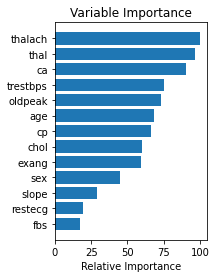

In [ ]:
#Test the importance of individual features to the model
feature_importance = rf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

I will drop the least important variables (relative importance > 25) and refit the model to see if it improves results.

In [ ]:
#Drop variables and re-split data
Xrf = heart_df.drop(columns = ['restecg', 'fbs'])

Xrf_train, Xrf_test, yrf_train, yrf_test = train_test_split(Xrf, y, test_size=.80)

rf2 = RandomForestClassifier(n_estimators = 22, random_state= 5)

rf2.fit(Xrf_train, yrf_train)
rf2_predictions = rf2.predict(Xrf_test)

print(classification_report(yrf_test, rf2_predictions, target_names = ['No Heart Disease', 'Heart Disease']))

                  precision    recall  f1-score   support

No Heart Disease       1.00      1.00      1.00       111
   Heart Disease       1.00      1.00      1.00       132

        accuracy                           1.00       243
       macro avg       1.00      1.00      1.00       243
    weighted avg       1.00      1.00      1.00       243



Accuracy is much improved on this new model, however most scores in the classification report are now at or near 1, which could indicate overfitting. To assess this risk, I've increased the test size up to 80% and I am still seeing very high accuracy. 

Please see conclusion for full explanation of considerations made in regards to overfitting.

Due to these high scores, no additional hyperparameter tuning deemed necessary.

##4. Gradient Boosting

In [ ]:
from sklearn import ensemble
# Make 500 iterations, use 2-deep trees, and set loss function

params = {'n_estimators': 1000, #SAME
          'learning_rate': .025, #SAME
          'max_depth': 7, #SAME
          'loss': 'exponential',
          'subsample': .9, #NEW
          'min_samples_split': 5
          } #loss function is deviance (using binary outcome so loss function cant be the residuals)

#initialize and fit model
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

#boost_predict_train = clf.predict(X_train)
boost_predict_test = clf.predict(X_test)

print(classification_report(y_test, boost_predict_test, target_names = ['No Heart Disease', 'Heart Disease']))

                  precision    recall  f1-score   support

No Heart Disease       0.86      0.88      0.87        43
   Heart Disease       0.89      0.88      0.88        48

        accuracy                           0.88        91
       macro avg       0.88      0.88      0.88        91
    weighted avg       0.88      0.88      0.88        91



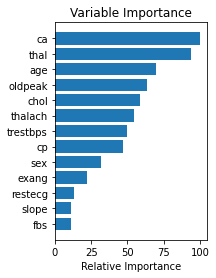

In [ ]:
#A#Test importance of individual features to the model
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

I will drop the least important variables (relative importance > 25) and refit the model to see if it improves results.

In [ ]:
#Drop variables and re-split data
Xgb = heart_df.drop(columns = ['exang', 'slope', 'restecg', 'fbs'])

Xgb_train, Xgb_test, ygb_train, ygb_test = train_test_split(Xgb, y, test_size=.95)

#Refit model
clf2 = ensemble.GradientBoostingClassifier(**params)
clf2.fit(Xgb_train, ygb_train)

boost_predict_test2 = clf2.predict(Xgb_test)

print(classification_report(ygb_test, boost_predict_test2, target_names = ['No Heart Disease', 'Heart Disease']))

                  precision    recall  f1-score   support

No Heart Disease       1.00      1.00      1.00       128
   Heart Disease       1.00      1.00      1.00       160

        accuracy                           1.00       288
       macro avg       1.00      1.00      1.00       288
    weighted avg       1.00      1.00      1.00       288



Accuracy is much improved on this new model, however most scores in the classification report are now at or near 1, which could indicate overfitting. To assess this risk, I've increased the test size up to 95% and I am still seeing very high accuracy. 

Please see conclusion for full explanation of considerations made in regards to overfitting.

Due to these high scores, no additional hyperparameter tuning deemed necessary.

##5. Support Vector Machines
(Performs best if categories are linearly separable with a clear separation between classes- Overlap between classes and noise degrades performance).

In [ ]:
from sklearn.svm import LinearSVC

svm = LinearSVC(max_iter=8000000)
svm.fit(X_train, y_train)

#svm_score = svm.score(X_test, y_test)
svm_predictions = svm.predict(X_test)

print(classification_report(y_test, svm_predictions, target_names = ['No Heart Disease', 'Heart Disease']))

                  precision    recall  f1-score   support

No Heart Disease       0.95      0.88      0.92        43
   Heart Disease       0.90      0.96      0.93        48

        accuracy                           0.92        91
       macro avg       0.93      0.92      0.92        91
    weighted avg       0.92      0.92      0.92        91



SVM needed a lot of iterations (8 million) to converge, possibly due to the size of the dataset. The time it takes this model to run may make it impractical for real world use.

##6. Logistic regression

In [ ]:
import statsmodels.api as sm
logit_model = sm.Logit(y_train, X_train)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.384801
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  212
Model:                          Logit   Df Residuals:                      199
Method:                           MLE   Df Model:                           12
Date:                Tue, 09 Feb 2021   Pseudo R-squ.:                  0.4405
Time:                        16:37:04   Log-Likelihood:                -81.578
converged:                       True   LL-Null:                       -145.80
Covariance Type:            nonrobust   LLR p-value:                 1.262e-21
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0192      0.022      0.860      0.390      -0.025       0.063
sex           -1.6997      0.

Based on the logistic regression results above, certain features were not significant contributors to the result, so I will remove them from the data and refit the model.

I will remove the following features due to them having a p-value over 0.05: ['age', 'trestbps', 'chol', 'fbs', 'restecg', 'oldpeak', 'slope']

In [ ]:
#Drop variables and re-split data
Xlr = heart_df.drop(columns = ['age', 'trestbps', 'chol', 'fbs', 'restecg', 'oldpeak', 'slope'])

Xlr_train, Xlr_test, ylr_train, ylr_test = train_test_split(Xlr, y, test_size=.70)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs', penalty='none', max_iter=1000)

#Fit the classifier to the data
lr.fit(Xlr_train, ylr_train)
lr_predictions = lr.predict(Xlr_test)

print(classification_report(ylr_test, lr_predictions, target_names = ['No Heart Disease', 'Heart Disease']))

                  precision    recall  f1-score   support

No Heart Disease       1.00      1.00      1.00        93
   Heart Disease       1.00      1.00      1.00       120

        accuracy                           1.00       213
       macro avg       1.00      1.00      1.00       213
    weighted avg       1.00      1.00      1.00       213



In [ ]:
accuracy_score(ylr_test, lr_predictions)

0.9465020576131687

In [ ]:
precision_score(ylr_test, lr_predictions)

0.9689922480620154

In [ ]:
#Classification report on train data
#lr_TRAIN_predictions = lr.predict(Xlr_train)
#print(classification_report(ylr_train, lr_TRAIN_predictions, target_names = ['No Heart Disease', 'Heart Disease']))

Accuracy is much improved on this new model, however most scores in the classification report are now at or near 1, which could indicate overfitting. To assess this risk, I've increased the test size up to 80% and I am still seeing very high accuracy. 

Please see conclusion for full explanation of considerations made in regards to overfitting.

#IV. Evaluations

###Confusion Matrices

In [ ]:
#1. KNN
cm_knn=confusion_matrix(yknn_test, knn_predictions, labels=[1,0])
print('1. KNN Confusion Matrix:')
print(cm_knn)

#2. Decision Tree
cm_dt=confusion_matrix(y_test, dt_predictions, labels=[1,0])
print('2. Decision Tree Confusion Matrix:')
print(cm_dt)

#3. Random Forest
cm_rf=confusion_matrix(yrf_test, rf2_predictions, labels=[1,0])
print('3. Random Forest Confusion Matrix:')
print(cm_rf)

#4. Boosted
cm_boost=confusion_matrix(ygb_test, boost_predict_test2, labels=[1,0])
print('4. Gradient Boosting Confusion Matrix:')
print(cm_boost)

#5. Support Vector Machines
svm_rf=confusion_matrix(y_test, svm_predictions, labels=[1,0])
print('5. SVM Confusion Matrix:')
print(svm_rf)

#6. Logistic Regression
cm_lr=confusion_matrix(ylr_test, lr_predictions, labels=[1,0])
print('6. Linear Classification Confusion Matrix:')
print(cm_lr)

1. KNN Confusion Matrix:
[[32 16]
 [11 32]]
2. Decision Tree Confusion Matrix:
[[45  3]
 [10 33]]
3. Random Forest Confusion Matrix:
[[132   0]
 [  0 111]]
4. Gradient Boosting Confusion Matrix:
[[160   0]
 [  0 128]]
5. SVM Confusion Matrix:
[[46  2]
 [ 5 38]]
6. Linear Classification Confusion Matrix:
[[120   0]
 [  0  93]]


###Classification Reports

In [ ]:
#1. KNN
print('1. KNN Classification Report:')
print(classification_report(yknn_test, knn_predictions, target_names = ['No Heart Disease', 'Heart Disease']))
print()

#2. Decision Tree
print('2. Decision Tree Classification Report:')
print(classification_report(y_test, dt_predictions, target_names = ['No Heart Disease', 'Heart Disease']))
print()

#3. Random Forest
print('3. Random Forest Classification Report:')
print(classification_report(yrf_test, rf2_predictions, target_names = ['No Heart Disease', 'Heart Disease']))
print()

#4. Gradient Boosting
print('4. Gradient Boosting Classification Report:')
print(classification_report(ygb_test, boost_predict_test2, target_names = ['No Heart Disease', 'Heart Disease']))
print()

#5.SVM
print('5. SVM Classification Report:')
print(classification_report(y_test, svm_predictions, target_names = ['No Heart Disease', 'Heart Disease']))
print()

#6. Logistic Regression
print('6. Logistic Regression Classification Report:')
print(classification_report(ylr_test, lr_predictions, target_names = ['No Heart Disease', 'Heart Disease']))

1. KNN Classification Report:
                  precision    recall  f1-score   support

No Heart Disease       0.67      0.74      0.70        43
   Heart Disease       0.74      0.67      0.70        48

        accuracy                           0.70        91
       macro avg       0.71      0.71      0.70        91
    weighted avg       0.71      0.70      0.70        91


2. Decision Tree Classification Report:
                  precision    recall  f1-score   support

No Heart Disease       0.92      0.77      0.84        43
   Heart Disease       0.82      0.94      0.87        48

        accuracy                           0.86        91
       macro avg       0.87      0.85      0.85        91
    weighted avg       0.86      0.86      0.86        91


3. Random Forest Classification Report:
                  precision    recall  f1-score   support

No Heart Disease       1.00      1.00      1.00       111
   Heart Disease       1.00      1.00      1.00       132

        ac

Logistic regression, Random Forest, and Gradient Boosting models have very strong scores.

###Cross fold validation

In [ ]:
#Cross fold validation
#TODO add std deviation of the variance so you can see how different the folds come out. big differences could mean overfitting
#better to sacrifice a little accuracy for consistent results. just do a standard deviation calc, just like the mean is done

#1. KNN
knn_cvs= cross_val_score(knn, Xknn_train, yknn_train, cv=5) #cvs=cross validation score

#2. Decision Tree
dt_cvs= cross_val_score(dt, X_train, y_train, cv=5) #cvs=cross validation score


#3. Random Forest
rf_cvs= cross_val_score(rf, Xrf_train, yrf_train, cv=5)

#4. Gradient Boosting
boost_cvs = cross_val_score(clf, Xgb_train, ygb_train, cv=5)

#5. SVM
#svm_cvs= cross_val_score(svm, X_train, y_train, cv=5)

#6. Logistic Regression
lr_cvs= cross_val_score(lr, Xlr_train, ylr_train, cv=5)

print('Accuracy score for the 5 folds: ') 
print('1. KNN: ', knn_cvs)
print('2. Decision Tree: ', dt_cvs)
print('3. Random Forest: ', rf_cvs)
print('4. Gradient Boosting: ', boost_cvs)
#print('5. SVM: ', svm_cvs)
print('6. Logistic Regression: ', lr_cvs)

print()

print('Mean cross-validation score: ')
print('1. KNN: ', np.mean(knn_cvs))
print('2. Decision Tree: ', np.mean(dt_cvs))
print('3. Random Forest: ', np.mean(rf_cvs))
print('4. Gradient Boosting: ', np.mean(boost_cvs))
#print('5. SVM: ', np.mean(svm_cvs))
print('6. Logistic Regression: ', np.mean(lr_cvs))

print()

print('Std deviation of cross-validation scores: ')
print('1. KNN: ', np.std(knn_cvs))
print('2. Decision Tree: ', np.std(dt_cvs))
print('3. Random Forest: ', np.std(rf_cvs))
print('4. Gradient Boosting: ', np.std(boost_cvs))
#print('5. SVM: ', np.mean(svm_cvs))
print('6. Logistic Regression: ', np.std(lr_cvs))


Accuracy score for the 5 folds: 
1. KNN:  [0.53488372 0.55813953 0.73809524 0.71428571 0.57142857]
2. Decision Tree:  [0.76744186 0.62790698 0.66666667 0.76190476 0.69047619]
3. Random Forest:  [1. 1. 1. 1. 1.]
4. Gradient Boosting:  [1. 1. 1. 1. 1.]
6. Logistic Regression:  [1. 1. 1. 1. 1.]

Mean cross-validation score: 
1. KNN:  0.6233665559246955
2. Decision Tree:  0.7028792912513844
3. Random Forest:  1.0
4. Gradient Boosting:  1.0
6. Logistic Regression:  1.0

Std deviation of cross-validation scores: 
1. KNN:  0.08510028726828381
2. Decision Tree:  0.054292486699450845
3. Random Forest:  0.0
4. Gradient Boosting:  0.0
6. Logistic Regression:  0.0


###Area under ROC curve

In [ ]:
#1. KNN
knn_probs=knn.predict_proba(Xknn_test)[:,1]
knn_auc = roc_auc_score(yknn_test, knn_probs)
print('1. KNN: {:.3f}'.format(knn_auc))

#2.Decision Tree
dt_probs=dt.predict_proba(X_test)[:,1]
dt_auc = roc_auc_score(y_test, dt_probs)
print('2. Decision Tree: {:.3f}'.format(dt_auc))

#3. Random Forest
rf_probs=rf2.predict_proba(Xrf_test)[:,1]
rf_auc = roc_auc_score(yrf_test, rf_probs)
print('3. Random Forest: {:.3f}'.format(rf_auc))

#4. Gradient Boosting
boost_probs=clf2.predict_proba(Xgb_test)[:,1]
boost_auc = roc_auc_score(ygb_test, boost_probs)
print('4. Gradient Boosting: {:.3f}'.format(boost_auc))

#5. SVM
svm_probs=svm.predict(X_test) #[:,1]
svm_auc = roc_auc_score(y_test, svm_probs)
print('5. SVM: {:.3f}'.format(svm_auc))

#6. Logistic Regression
lr_probs=lr.predict_proba(Xlr_test)[:,1]
lr_auc = roc_auc_score(ylr_test, lr_probs)
print('6. Logistic Regression: {:.3f}'.format(lr_auc))

1. KNN: 0.738
2. Decision Tree: 0.926
3. Random Forest: 1.000
4. Gradient Boosting: 1.000
5. SVM: 0.921
6. Logistic Regression: 1.000


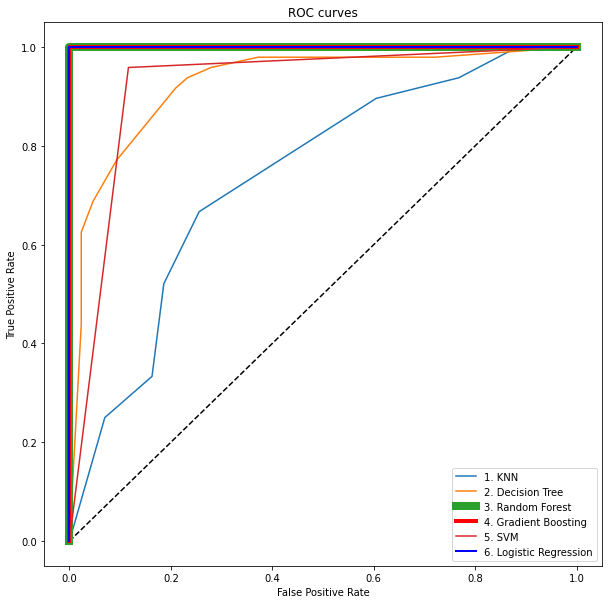

In [ ]:
from sklearn.metrics import roc_curve
fpr_knn, tpr_knn, thresholds_knn = roc_curve(yknn_test, knn_probs)
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, dt_probs)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(yrf_test, rf_probs)
fpr_boost, tpr_boost, thresholds_boost = roc_curve(ygb_test, boost_probs)
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, svm_probs)
fpr_lr, tpr_lr, thresholds_lr = roc_curve(ylr_test, lr_probs)

fig = plt.figure(figsize = (10, 10))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_knn, tpr_knn, label='1. KNN')
plt.plot(fpr_dt, tpr_dt, label='2. Decision Tree')
plt.plot(fpr_rf, tpr_rf, label='3. Random Forest', linewidth=8)
plt.plot(fpr_boost, tpr_boost, label='4. Gradient Boosting', color='red', linewidth=4)
plt.plot(fpr_svm, tpr_svm, label='5. SVM')
plt.plot(fpr_lr, tpr_lr, label='6. Logistic Regression', color='blue', linewidth=2)

plt.legend(loc='lower right')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves')
plt.show()

#V. Conclusion

##Heart disease can be predicted based on these models

Based on the results above, the use of supervised machine learning is an effective tool in predicting heart disease based on the key diagnostic measures included in this dataset. In particular, 3 of these models- Random Forest, Gradient Boosting, and Logistic Regression- were extremely effective after minor tweaks to the feature set.

###Note on Overfitting

For the Random Forest, Gradient Boosting, and Logistic regression models, I performed an importance analysis on the feature set to assess if removing the less important features would result in improvements to the respective models.

This ended up causing drastic improvements in these models, bringing them near 100% accuracy with a 20% test split. Such high accuracy made me suspicious that the models could be overfitting.

To further assess this risk I performed the following steps:
- Increased test split. I was able to increase the split up to 80% for Random Forest and up to 95% for Logistic Regression, while still maintaining accuracy scores near 1.00.
- I performed 5-fold cross validation and accuracy remained high across all folds for these models.

Based on the consistently high evaluation scores across all folds, and when using very small training splits, I feel comfortable that the model is not overfitting. I think there are some clear indicators of heart disease in this dataset which are allowing for such high effectiveness of these models. This particular dataset is also relatively small so I would like to expand testing to a larger dataset in the future.

##The best model is ...

In balancing explanatory versus predictive power, I must weigh the ease of interpretation of the chosen model against it's predictive accuracy. A simpler model such as regression is more easily explainable to a broader audience, but not all data fits this type of model. More complex models such as gradient boosting may in many cases be more powerful, but the tradeoff is that they are more difficult to understand and explain without getting overly technical.

The practical application of this project is to facilitate earlier detection of heart disease in order to accelerate treatment. Therefore the primary goal is to use these variables to generate an accurate prediction so I would prioritize predictive accuracy for this use case.

However, in this instance we have 3 models that perform very well- Random Forest, Gradient Boosting and Logistic Regression. Given that there is not a significant drop in predictive power between the models, I would opt for the most interpretable of the 3, which is Logistic Regression.